<font style='font-size:1.5em'>**🧑‍🏫 Week 10 Lecture**</font><br>
<font style='font-size:1.3em;color:#888888'>NOTEBOOK 01: Analysis of Educational Attainment Across English Towns</font>

<font style='font-size:1.2em;color:#e26a4f;font-weight:bold'>LSE DS105A – Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

🗓️ **DATE:** 5 December 2024 

⌚ **TIME:** 16.00-18.00

📍 **LOCATION:** CLM.5.02
</div>


**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io)

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**CONTEXT**: In July 2023, the UK Office for National Statistics (ONS) published the following analysis online: ["Why do children and young people in smaller towns do better academically than those in larger towns?"](https://www.ons.gov.uk/peoplepopulationandcommunity/educationandchildcare/articles/whydochildrenandyoungpeopleinsmallertownsdobetteracademicallythanthoseinlargertowns/2023-07-25). I replicate a few parts of this report in this notebook. Let's pretend this is a complete analysis after a thorough data exploration and cleaning process. Jupyter Notebooks are good for sharing with data-savvy colleagues, but what if we want to reach a broader audience? What if we want our research to be as engaging and accessible as the original ONS article?

**OBJECTIVE**: In this lecture, we'll transform our technical analysis (**this notebook**) into a public-facing website using GitHub Pages, making our research findings accessible to educators, policymakers, and anyone interested in understanding educational patterns across English towns.

---

**⚙️ SETUP**

Before you continue, set up your Python environment. Check the instructions under the ['🐍 Python environment' section on README](../README.md#🐍-python-environment).

<span style="color: #333333; background-color:rgba(226, 180, 79, 0.1); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 450px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;display:block;">⚠️ **WARNING:** There is a new package to install this week: `openpyxl`. <br><br>Either update your environment using the `requirements.txt` file or install it manually by running `pip install openpyxl`. </span>

In [1]:
import os
import json
import requests

import pandas as pd

from tqdm.notebook import tqdm
tqdm.pandas()

from IPython.display import Image, display

from lets_plot import *
LetsPlot.setup_html()

**Custom Util Functions**

In [2]:
def theme_ons():
    return theme(
        # Title and subtitle
        plot_title=element_text(family="Helvetica", size=16, face="bold", vjust=0, margin=[10, 0, 0, 0]),
        plot_subtitle=element_text(family="Helvetica", size=14, vjust=1, margin=[10, 0, 0, 0]),
        plot_caption=element_text(family="Helvetica", size=10, hjust=-1, margin=[0, 0, 0, 468/2 + 10]),

        # Axes
        axis_text=element_text(family="Helvetica", size=13),
        
        # Base styling
        text=element_text(family="Helvetica"),
    
        # Grid lines matching ONS style
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
    )

# 1. Reading the Data

We will replicate two plots from the ONS report: 🌐 ["Why do children and young people in smaller towns do better academically than those in larger towns?"](https://www.ons.gov.uk/peoplepopulationandcommunity/educationandchildcare/articles/whydochildrenandyoungpeopleinsmallertownsdobetteracademicallythanthoseinlargertowns/2023-07-25).

The ONS has made our lives easier by providing a very clean dataset ready for the plot. We just need to load it and start plotting.

<details style="width:50%;font-size:0.9em;border: 1px solid #aaa;border-radius: 4px;padding: .5em;margin-left:1.5em"><summary style="font-weight: bold;padding: .5em;border-bottom: 1px solid #aaa;">🔵 Of course, we are taking a shortcut here...</summary>

In a real project, you would need to:

- **Load the data**: The ONS staff had to gather the data from multiple sources (as indicated in the captions of their plots)

- **Clean the data**: I am pretty sure the data was not super clean when they first got it. They would have had to deal with missing values, outliers, and other data quality issues.

- **Transform the data**: They very likely had to create a few merges (joins, in SQL terms) to bring together the data from different sources.

- **Summarise the data**: Only then they produced the very neat XLSX files that we are using here, which are already summarised and ready for plotting.

</details>

## Read data for the first plot

Note that we'll be using [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) to read the data from an Excel file.

In [3]:
file_path = "../data/ons_uk_education/edu_attainment_by_settlement_type.xlsx"
column_names = [
    "settlement_type",
    "age18_level3_qualifications",
    "age19_higher_education",
    "age19_further_education",
]

# After inspecting the spreadsheet, I found that I need to ignore the first 5 rows and only read the next 7 rows
df_edu_attainment = pd.read_excel(file_path, skiprows=5, nrows=7, names=column_names)

df_edu_attainment

,settlement_type,age18_level3_qualifications,age19_higher_education,age19_further_education
0,Small towns,49.7,20.6,33.3
1,Medium towns,47.7,20.1,32.6
2,Large towns,47.3,19.2,33.6
3,Cities,42.3,20.7,32.8
4,Inner London,53.5,14.0,49.3
5,Outer London,57.1,14.3,48.5


<div style="background-color: #fff; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px; margin: 10px; max-width:450px; box-sizing: border-box;font-size:0.9em;">

☝️ **TEACHING NOTES:**

- **The data is above is 'tidy'**: each row represents a unique observation (a town) and each column represents a variable about that observation.

This is what we aim for when producing a plot-ready dataset.

</div>

## Read data for the second plot

The other plot also comes from an Excel file. Let's read it in.

In [4]:
file_path = "../data/ons_uk_education/edu_attainment_scores_by_town_size.xlsx"

# I can keep the column names but I found that I need to ignore the first 4 rows
df_edu_scores = pd.read_excel(file_path, skiprows=4)

display(df_edu_scores)

,TOWN11CD,TOWN11NM,Town size,Educational attainment score
0,E34000007,Carlton in Lindrick BUA,Small Towns,-0.534
1,E34000016,Dorchester (West Dorset) BUA,Small Towns,1.952
2,E34000020,Ely BUA,Small Towns,-1.044
3,E34000026,Market Weighton BUA,Small Towns,-1.249
4,E34000027,Downham Market BUA,Small Towns,-1.169
...,...,...,...,...
1099,K06000004,Chester BUASD,Large Towns,-0.811
1100,Inner London BUAs,Inner London BUAs,London,0.068
1101,Outer london BUAs,Outer london BUAs,London,1.262
1102,Not BUA,Not BUA,Not BUA,1.802


In [5]:
# Let's get a sense of the data types and the number of missing values
df_edu_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TOWN11CD                      1104 non-null   object 
 1   TOWN11NM                      1104 non-null   object 
 2   Town size                     1104 non-null   object 
 3   Educational attainment score  1104 non-null   float64
dtypes: float64(1), object(3)
memory usage: 34.6+ KB


# 2. Replicating the first plot

Below, I will write code to replicate the plot below:

![](../figures/ons_uk_education/figure1_attainment_after18.png){width=50%}

<div style="background-color: #fff; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px; margin: 10px; max-width:450px; box-sizing: border-box;font-size:0.9em;">

☝️ **TEACHING NOTES:**

Notice how they engage with all the best practices of reporting we've been discussing in the course:

- **Title**: The title reveals the main takeaway from the plot. It tells a story.

- **Subtitle**: The subtitle provides context and additional information.

- **Y-axis**: The y-axis is clearly labelled and the scale is appropriate. They put the text horizontally to make it easier to read.

- **X-axis**: There's no need for a title on the x-axis because the labels are self-explanatory.

- **Source**: The sources of data (without the technical details) are clearly stated in the caption.


</div>

## 2.1 Minor data preparation

The data is super tidy but I still need to do a few tweaks to make the plot look exactly like the one in the ONS report:

### 2.1.1 Melt the data

I need to 'melt' the data so I can plot all the variables side by side. This will make it easier to compare the different types of settlements.

We'll use the [DataFrame.melt()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function from pandas to do this, and it takes these arguments:

- **`id_vars`**: the columns we want to keep as they are\

- **`value_vars`**: the columns we want to melt into rows

- **`var_name`**: the name of the new column that will store the old column names

<span style="display:block;background-color:rgba(93, 158, 188, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:50%">💭 <strong>Think about it:</strong> What would happen if I didn't melt the data?</span>


### 2.1.2 Fix the order of the settlement types

In [6]:
# I had to use reversed() here because the order of the bars was reversed
fixed_order_settlement_type = [
        "Small towns",
        "Medium towns",
        "Large towns",
        "Cities",
        "Outer London",
        "Inner London",
    ]

I will use the list above as the natural ordering of the `settlement_type` column.

We use pandas' [Categoricals](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to handle this type of situation (see method chaining below).

<span style="display:block;background-color:rgba(93, 158, 188, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:50%">💭 <strong>Think about it:</strong> What do you think would happen if I just didn't bother with converting the column to a Categorical?</span>

### 2.1.3 Fix the order of the 'attainment' levels

We'll do the same as above for the `attainment` column.

In [7]:
fixed_order_attainment = [
    "age18_level3_qualifications",
    "age19_higher_education",
    "age19_further_education",
]

### 2.1.4 Remap the 'attainment' text

The titles of the attainment levels are in a good format for Python, but not for a plot. 

I will remap them to a more human-readable format and to match the ONS plot.

| Original Column Name                  | Remapped Column Name                          |
|---------------------------------------|-----------------------------------------------|
| age18_level3_qualifications           | Level 3 qualifications at age 18              |
| age19_higher_education                | In full-time higher education at age 19       |
| age19_further_education               | In further education at age 19                |

In [8]:
attainment_map = {
        'age18_level3_qualifications': 'Level 3 qualifications at age 18',
        'age19_higher_education': 'In full-time higher education at age 19',
        'age19_further_education': 'In further education at age 19'
    }

**Here goes the preparation code:**

In [9]:
#I like to call it plot_df so I don't mess up the original data
plot_df = (
    df_edu_attainment.melt(id_vars=["settlement_type"], var_name="attainment", value_name="percentage")
                     .assign(settlement_type=lambda x: pd.Categorical(x["settlement_type"], 
                                                                      categories=fixed_order_settlement_type, 
                                                                      ordered=True),
                             attainment=lambda x: pd.Categorical(x["attainment"],
                                                                 categories=fixed_order_attainment,
                                                                 ordered=True))
                     .assign(attainment=lambda x: x["attainment"].cat.rename_categories(attainment_map))
    
)
plot_df

,settlement_type,attainment,percentage
0,Small towns,Level 3 qualifications at age 18,49.7
1,Medium towns,Level 3 qualifications at age 18,47.7
2,Large towns,Level 3 qualifications at age 18,47.3
3,Cities,Level 3 qualifications at age 18,42.3
4,Inner London,Level 3 qualifications at age 18,53.5
5,Outer London,Level 3 qualifications at age 18,57.1
6,Small towns,In full-time higher education at age 19,20.6
7,Medium towns,In full-time higher education at age 19,20.1
8,Large towns,In full-time higher education at age 19,19.2
9,Cities,In full-time higher education at age 19,20.7


Notice that the two columns we fixed are now ordered as we wanted and are of type `category`.

In [10]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   settlement_type  18 non-null     category
 1   attainment       18 non-null     category
 2   percentage       18 non-null     float64 
dtypes: category(2), float64(1)
memory usage: 664.0 bytes


If you display a categorical column, you will see at the bottom, the categories and their order.

In [11]:
plot_df['attainment']

0            Level 3 qualifications at age 18
1            Level 3 qualifications at age 18
2            Level 3 qualifications at age 18
3            Level 3 qualifications at age 18
4            Level 3 qualifications at age 18
5            Level 3 qualifications at age 18
6     In full-time higher education at age 19
7     In full-time higher education at age 19
8     In full-time higher education at age 19
9     In full-time higher education at age 19
10    In full-time higher education at age 19
11    In full-time higher education at age 19
12             In further education at age 19
13             In further education at age 19
14             In further education at age 19
15             In further education at age 19
16             In further education at age 19
17             In further education at age 19
Name: attainment, dtype: category
Categories (3, object): ['Level 3 qualifications at age 18' < 'In full-time higher education at age 19' < 'In further education at age 19'

## Replicating the Plot

Things I had to do to replicate the plot (**and decisions I made to improve it a bit further**):

- Add a 'fake bar' to colour the background of bars in gray

- Restrict the length of bars to a maximum of 60% (`limits=(0, 60)`)

- Move all the text to inside the bars (no need to use two different text colours)

In [12]:
full_title = """
Cities (outside London) have lower average attainment at age 18 
than towns, but similar levels of enrolment in higher education
"""

full_subtitle = """
Proportion of the 2012 to 2013 GCSE cohort achieving Level 3 qualification at age 18, 
participating in further education or higher education at age 19, by towns and 
cities groupings, England
"""

full_caption = """
Source: Office for National Statistics analysis using Longitudinal Education Outcomes (LEO), 
Department for Education, Index of Multiple Deprivation 2019 from the Department for 
Levelling Up, Housing and Communities (DLUHC)
(this is a replica of a plot that exists in the UK ONS website)
"""

plot_edu_attainment = (
    ggplot(plot_df, aes(x="percentage", y="settlement_type", fill="attainment"))
    + geom_bar(fill='#ECECEC', x=60) # Trick to get the grey bar in the background
    + geom_bar(stat="identity")
    + geom_text(aes(label="percentage"), ha="left", size=7, color="white", nudge_x=-5, label_format="d")
    + scale_fill_manual(values=["#3EA0CC", "#2F8C7B", "#133B57"], guide='none')
    + facet_grid(x="attainment", x_order=-1)
    + scale_x_continuous(limits=(0, 60), breaks=list(range(0, 61, 20)), format="d")
    + scale_y_discrete(limits=list(reversed(fixed_order_settlement_type)))
    + labs(title=full_title, subtitle=full_subtitle, x="", y="", caption=full_caption)
    + ggsize(700, 468)
    + theme_ons()
)

plot_edu_attainment

**Save the plot to an image file:**

In [13]:
ggsave(plot_edu_attainment, "plot1_edu_attainment.png", path="../figures/ons_uk_education/")
ggsave(plot_edu_attainment, "plot1_edu_attainment.svg", path="../figures/ons_uk_education/")

'/Users/j.cardoso-silva/Workspace/ds105a-2024/figures/ons_uk_education/plot1_edu_attainment.svg'

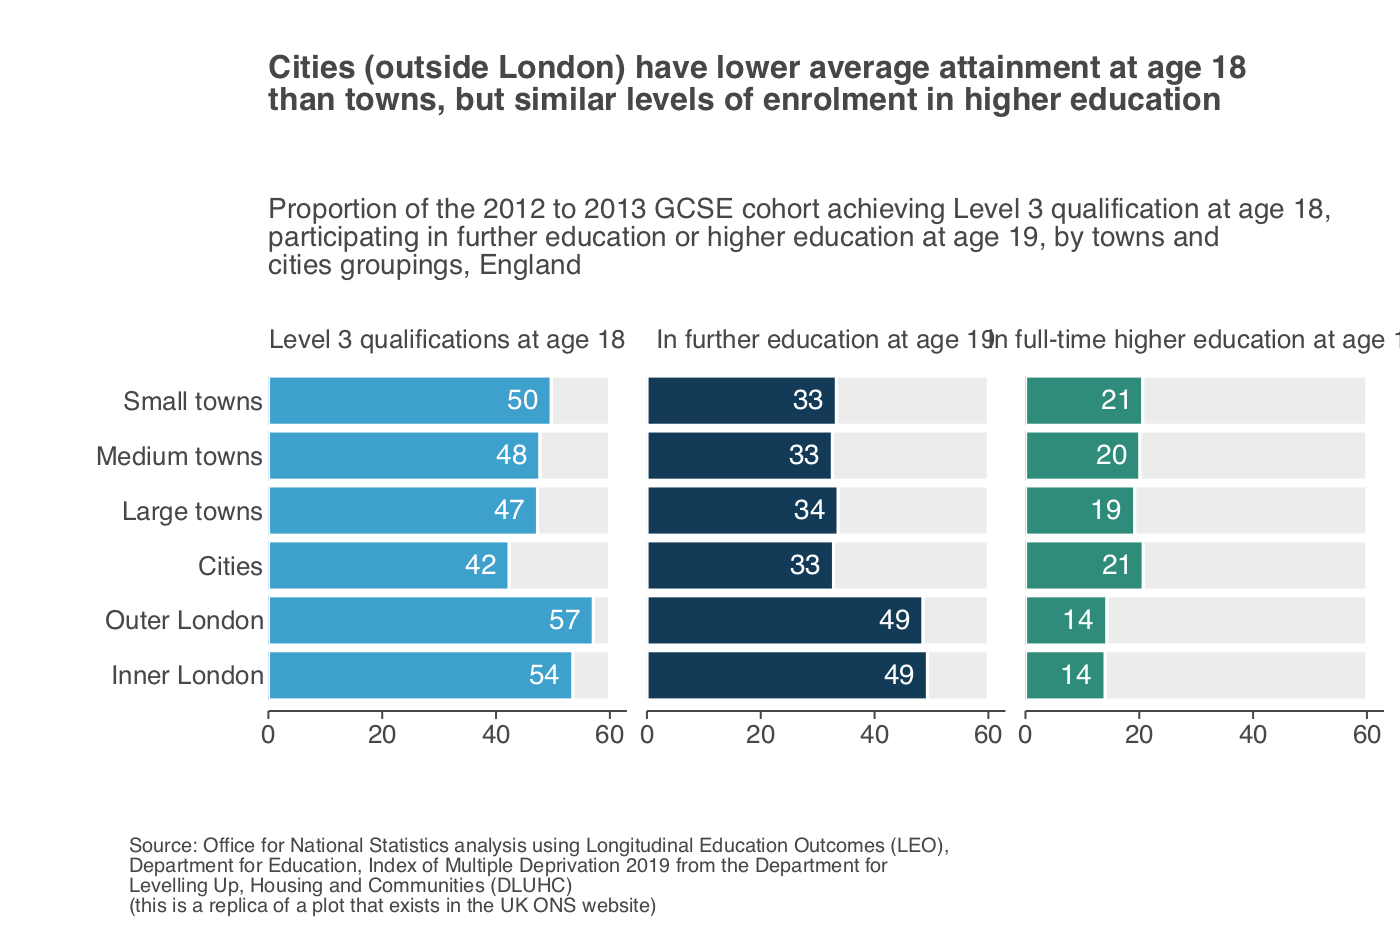

In [14]:
Image(filename="../figures/ons_uk_education/plot1_edu_attainment.png", width=700, height=468)

# 3. (LIVE DEMO) 

Now watch my demonstration as I move this plot to a website using GitHub Pages.

# 4. (ACTIVITY) Breakdown of education attainment scores by town

🎯 **ACTION POINTS:**

Who can reproduce the plot below as close as possible to the original (ignore the dropdown menu)?

![](../figures/ons_uk_education/figure2_edu_attainment_score_per_town.png){width=40%}

---

# What's Next? ⏭️

Let's talk about the final phase of our course - your group projects! 

I want you to experience real-world collaborative data science, so tomorrow you'll form groups of 3 (a few groups might need 4 people to make the numbers work, that's fine).

## Project requirements

A detailed marking criteria will be provided later, but for now, here's a rough outline of what you'll need to do.

The size and scope of the final project is similar to the W10 Summative, with a few tweaks. The project should involve:

- Getting interesting data from somewhere (**this time you choose from where**)
- Organising it nicely (e.g. files? databases?)
- A healthy dose of data cleaning and wrangling with pandas
- A description of the question(s) you want to pose to the data
- Cool visualizations to tell your story (**this time, you can use any plotting library you like, not just `lets-plot`!**)
- 🆕 GitHub evidence of how you worked together as a group (e.g.: GitHub Issues, branches, Pull Requests, project board)
- 🆕 A GitHub Page to tell about your findings

## 🗣️ For Next Week: Project Pitch

You are to present your project idea to the class on the very last day of Autumn Term!

Keep it short (3-5 minutes) but make it count - this is worth 10% of your grade. 

**We don't want to see data!** All I want you to present is:
- What data you're planning to use (there's a guide for this, check the 'Choosing a Data Source' page)
- What kind of questions you're hoping to answer
- How you'll divide the work among your team

### Format

- **Your presentation MUST be a GitHub Page**: you are to present your pitch as a GitHub Page. Use what you learned today to make it engaging and accessible.

- **DO NOT ADD A LOT OF TEXT**: remember, you're presenting this live. The page should be a visual aid to your presentation, not a script.

- Consider adding a little diagram or some images to make it more engaging.

I'll put the detailed rubric on Moodle by Friday, but for now, start thinking about what datasets excite you and what stories they might tell.


**🏆 IN NEED OF A CHALLENGE?**

- Take a look at [Streamlit](https://streamlit.io/), a Python library that allows you to create interactive web apps with just a few lines of code. It's a great way to share your data science projects with a broader audience. **Be careful when using dashboards! They shouldn't prevent you from telling a story.**

- Consider producing a more complete website with [Quarto Markdown](https://quarto.org/). 